# Exploratory data analysis | EDA

## Данные:

В это работе я проанализирую набор данных Airbnb в Сиэтле за 2022 год. Информация о наборе данных и загрузка: http://insideairbnb.com/get-the-data.html

Датасет содержит следующие атрибуты:

* id: Уникальный идентификатор объявления.
* name: Название объявления.
* host_id: Уникальный идентификатор хозяина.
* host_name: Имя хозяина.
* neighbourhood_group: Группа районов.
* neighbourhood: Название района.
* latitude: Широта местоположения жилья.
* longitude: Долгота местоположения жилья.
* room_type: Тип комнаты (например, "Отдельная комната" или "Жилье целиком").
* price: Цена за ночь в евро. 
* minimum_nights: Минимальное количество ночей, которое необходимо забронировать.
* number_of_reviews: Общее количество отзывов.
* last_review: Дата последнего отзыва.
* reviews_per_month: Среднее количество отзывов в месяц.
* calculated_host_listings_count: Общее количество объявлений хозяина.
* availability_365: Количество доступных дней для бронирования в течение следующих 365 дней.
* number_of_reviews_ltm: Количество отзывов за последние 12 месяцев. Показывает активность объекта размещения за последний год.
* licence: Номер лицензии объекта размещения. Указывает на наличие лицензии у хозяина для предоставления услуг сдачи жилья. Может содержать пропущенные значения, если лицензия не предоставлена или не требуется.

### Загрузка и чтение данных

In [5]:
# Загрузка библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math

In [6]:
# Загрузка данных
data_original = pd.read_csv('listings.csv')

# Вывожу первые 5 строк
data_original.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,879181,In Jimi Hendrix's neighborhood 3,287172,Laura,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,2022-12-16,0.80,2,247,4,STR-OPLI-19-002301
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,2022-09-03,0.95,3,99,2,str-opli-19-002622
2,902609,Entire guest suite in West Seattle,3264544,Fabio,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,2023-03-21,1.95,5,206,27,STR-OPLI-19-002360
3,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,2023-01-15,1.14,9,356,20,STR-OPLI-19-003039
4,226536,Serene Room in Sunny Cottage near Discovery Park,209571,Cheryl,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2022-12-12,2.28,1,209,53,STR-OPLI-19-000684


### Предобработка данных

В предобработке я:

* Исследую пропущенные значения в наборе данных. Определяю столбцы с большим количеством пропущенных значений.

* Удалю дубликаты строк и обработаю все пропуски.

* Преобразую типы данных при необходимости. Например, если столбец 'last_review' имеет тип данных object, преобразую его в формат datetime.

* Вывожу информацию о DataFrame для проверки успешного выполнения всех операций предварительной обработки.

In [7]:
# Вывожу по убыванию долю пропущенных значений по каждому признаку
print(data_original.isna().mean().sort_values(ascending=False))

license                           0.228827
reviews_per_month                 0.170483
last_review                       0.170483
name                              0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64


Наибольшее количество пропущенных значений по столбцу license - 22.9%

#### Удаление дубликатов

In [8]:
seattle = data_original.drop_duplicates()

#### Обработка пропусков

В описании датасета написано, что license может содержать пропущенные значения, если лицензия не предоставлена или не требуется.
Поэтому заполню пропуски строкой "No license".

In [9]:
seattle['license'].fillna('No license', inplace=True)

В столбцах last_review (дата последнего отзыва) и reviews_per_month (среднее количество отзывов в месяц) одинаковое количество пустых значений (примерно 17%). 
У меня есть предположение, что эти значения пустые, так как у определенных объявлений в целом нет отзывов и в столбце number_of_reviews (количество отзывов) стоят 0, а не NaN. 
Проверю эту гипотезу.

In [10]:
# Находим строки, где столбцы 'last_review' и 'reviews_per_month' пустые. 
pustoli = seattle['last_review'].isna() & seattle['reviews_per_month'].isna()
result = seattle[pustoli]

# Нахожу размерность полученной таблицы, чтобы удостовериться, что количество строк, где столбцы last_review и reviews_per_month одновременно пустые, равно количеству NaN в них.
rows = result.shape[0]

# Нахожу количество NaN в 2 столбцах
na_count = seattle['last_review'].isna().sum()
na_count2 = seattle['reviews_per_month'].isna().sum()

# Находим сумму значений в столбце 'number_of_reviews' в таблице result, чтобы проверить, что у всех этих объектов Airbnb отсутствуют отзывы
sum_number_of_reviews = result['number_of_reviews'].sum()

if ((na_count ==  rows) & (na_count2 == rows) & (sum_number_of_reviews == 0)) == True: print(True)
else: print(False)

True


В выводе получаю True, значит отсутствующие значения относятся к объектам с нулевыми отзывами.

У таких объявлений могут быть различные причины отсутствия каких-либо отзывов. Это может быть связано с тем, что они изначально непривлекательны, владелец публикует объекты для других целей или хозяин только начал размещать свои объекты на платформе. Чтобы уменьшить неопределенность в модели, я решила исключить эти данные из дальнейшего анализа.

In [11]:
# Удаляю строки с нулевыми отзывами
seattle = seattle.query('number_of_reviews>0')

In [12]:
# Меняю тип столбца last_review в дату
seattle['last_review'] = pd.to_datetime(seattle['last_review'], dayfirst = False)

In [13]:
# Вывожу информацию по датасету после предобработки данных
seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5289 entries, 0 to 6375
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5289 non-null   int64         
 1   name                            5289 non-null   object        
 2   host_id                         5289 non-null   int64         
 3   host_name                       5289 non-null   object        
 4   neighbourhood_group             5289 non-null   object        
 5   neighbourhood                   5289 non-null   object        
 6   latitude                        5289 non-null   float64       
 7   longitude                       5289 non-null   float64       
 8   room_type                       5289 non-null   object        
 9   price                           5289 non-null   int64         
 10  minimum_nights                  5289 non-null   int64         
 11  numb

### Исследование выбросов

* Визуализирую распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots) или гистограммы.

* Используя визуализации, определю наличие выбросов в числовых столбцах и приму решение о том, как их обработать

* После обработки выбросов визуализирую распределения числовых столбцов снова, чтобы убедиться, что выбросы были успешно обработаны.

In [14]:
# Чтобы сохранить предобработанный датасет, создам новый и буду дальше работать с выбросами
seattle_clean = seattle

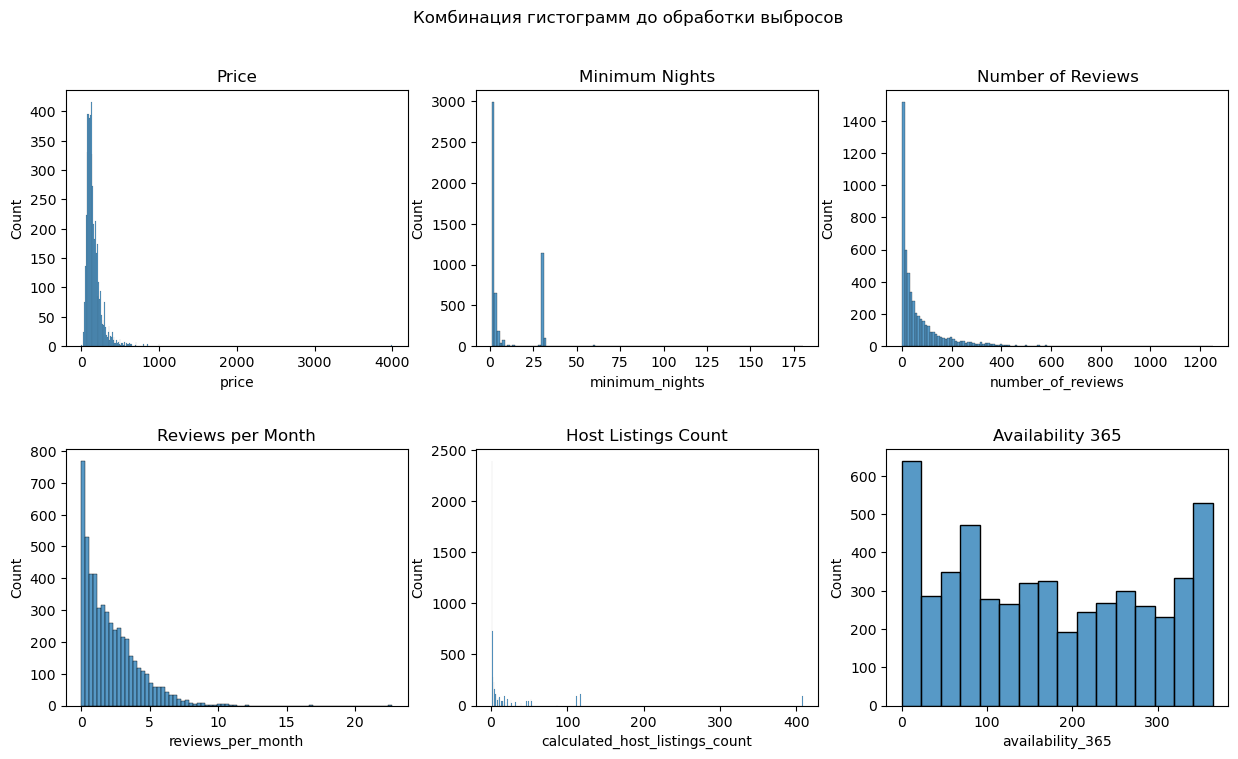

In [15]:
# Создаю объекты фигуры и массив подуровней axs с 2 рядами и 3 столбцами подуровней
fig, axs = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(15, 8),
    sharey=False, 
    sharex=False, 
    gridspec_kw={'hspace':0.4}
)

# График для 'price'
sns.histplot(seattle['price'], ax=axs[0, 0])
axs[0, 0].set_title('Price')

# График для 'minimum_nights'
sns.histplot(seattle['minimum_nights'], ax=axs[0, 1])
axs[0, 1].set_title('Minimum Nights')

# График для 'number_of_reviews'
sns.histplot(seattle['number_of_reviews'], ax=axs[0, 2])
axs[0, 2].set_title('Number of Reviews')

# График для 'reviews_per_month'
sns.histplot(seattle['reviews_per_month'], ax=axs[1, 0])
axs[1, 0].set_title('Reviews per Month')

# График для 'calculated_host_listings_count'
sns.histplot(seattle['calculated_host_listings_count'], ax=axs[1, 1])
axs[1, 1].set_title('Host Listings Count')

# График для 'availability_365'
sns.histplot(seattle['availability_365'], ax=axs[1, 2])
axs[1, 2].set_title('Availability 365')

# Задаю заголовок всему графику
fig.suptitle('Комбинация гистограмм до обработки выбросов')

# Отображаю график
plt.show()


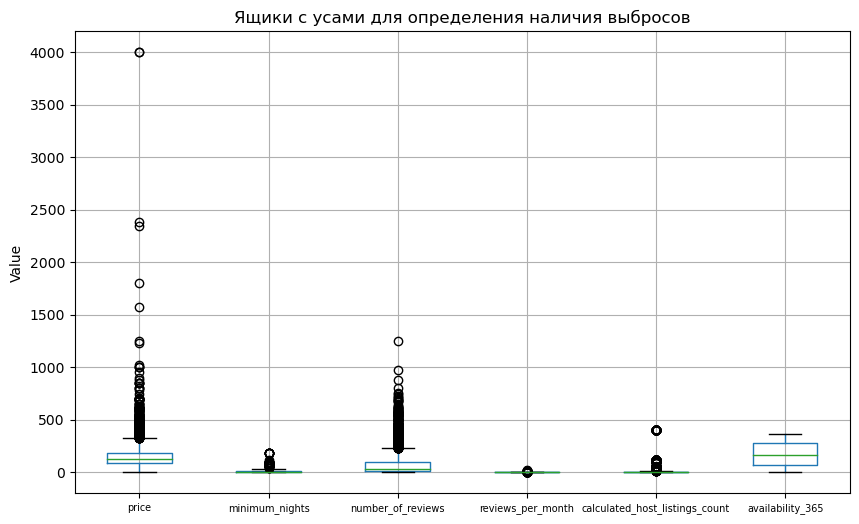

In [16]:
columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

fig, ax = plt.subplots(figsize=(10,6))
seattle.boxplot(column=columns, ax=ax)
ax.set_title("Ящики с усами для определения наличия выбросов")
ax.set_ylabel("Value")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

plt.show()

У всех переменных, кроме 'availability_365' есть выбросы. Это можно заметить по наблюдениям, отображенным в виде окружности и не попавшим в синий прямоугольник.

**Обработка выбросов по признаку price**

Я решила прологарифмировать значения по признаку price, так как такая переменная, как цена, часто имеет скошенное распределение. А логарифмирование позволяет сгладить распределение и сделать его более нормальным, что упрощает анализ и позволяет обнаруживать выбросы более эффективно.

In [17]:
# Логарифмирование столбца 'price'
seattle_clean['price_log'] = np.log(seattle_clean['price'])

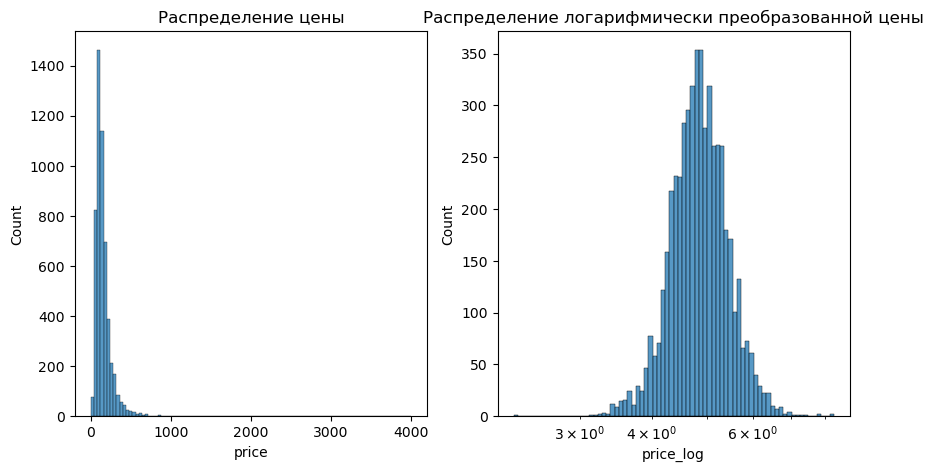

In [18]:
# Визуализация цены до и после логарифмирования
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(data=seattle_clean, x='price', bins=100, ax=axs[0])
sns.histplot(data=seattle_clean, x='price_log', log_scale=True, ax=axs[1])
axs[0].set_title('Распределение цены')
axs[1].set_title('Распределение логарифмически преобразованной цены')
plt.show()

Как видно по второй гистограмме, распределение стало сильно приближено к нормальному.

**Обработка выбросов по признаку minimum_nights**

В данных есть объекты, которые нужно бронировать как минимум на 30-180 ночей. Наверно, у каких-то хозяинов есть специфичная причина для такого большого количества дней. Чтобы снизить неопределенность, я найду значение 99-го перцентиля и заменю все выбросы на него, чтобы устранить влияние крайне больших значений на анализ данных.

In [19]:
# Находим 99 перцентиль
p99 = seattle_clean['minimum_nights'].quantile(0.99)

# Заменяем все значения выше 99 перцентиля на значение 99 перцентиля
seattle_clean['minimum_nights'] = seattle_clean['minimum_nights'].apply(lambda x: p99 if x > p99 else x)

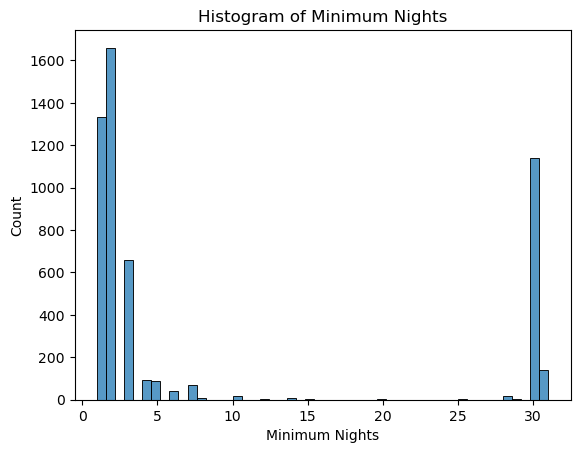

In [20]:
# Визуализация признака minimum_nights после обработки выбросов.
sns.histplot(data=seattle_clean, x='minimum_nights', bins=50)
plt.title('Histogram of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.show()

**Обработка выбросов по признаку number_of_reviews**

In [21]:
# Подсчитываем количество выбросов по признаку number_of_reviews

# Находим Q1 и Q3
Q1 = seattle_clean['number_of_reviews'].quantile(0.25)
Q3 = seattle_clean['number_of_reviews'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Определяем нижнюю и верхнюю границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(seattle_clean[(seattle_clean['number_of_reviews'] < lower_bound) | (seattle_clean['number_of_reviews'] > upper_bound)])

print("Количество выбросов:", outliers_count)

Количество выбросов: 442


Доля выбросов по этому признаку невелико (~8%), поэтому я удалю их.

In [22]:
# Удаляем выбросы
seattle_clean = seattle_clean[(seattle_clean['number_of_reviews'] >= lower_bound) & (seattle_clean['number_of_reviews'] <= upper_bound)]

In [23]:
# Подсчитываем количество выбросов после удаления
outliers_count = len(seattle_clean[(seattle_clean['number_of_reviews'] < lower_bound) | (seattle_clean['number_of_reviews'] > upper_bound)])

print("Количество оставшихся выбросов:", outliers_count)

Количество оставшихся выбросов: 0


**Обработка выбросов по признаку reviews_per_month**

In [24]:
# Подсчитываем количество выбросов по признаку reviews_per_month

# Находим Q1 и Q3
Q1 = seattle_clean['reviews_per_month'].quantile(0.25)
Q3 = seattle_clean['reviews_per_month'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Определяем нижнюю и верхнюю границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(seattle_clean[(seattle_clean['reviews_per_month'] < lower_bound) | (seattle_clean['reviews_per_month'] > upper_bound)])

print("Количество выбросов:", outliers_count)

Количество выбросов: 132


Доля выбросов по признаку 'reviews_per_month' невелико (~2%), поэтому я удалю их.

In [25]:
# Удаляем выбросы
seattle_clean = seattle_clean[(seattle_clean['reviews_per_month'] >= lower_bound) & (seattle_clean['reviews_per_month'] <= upper_bound)]

In [26]:
# Подсчитываем количество выбросов после удаления
outliers_count = len(seattle_clean[(seattle_clean['reviews_per_month'] < lower_bound) | (seattle_clean['reviews_per_month'] > upper_bound)])

print("Количество оставшихся выбросов:", outliers_count)

Количество оставшихся выбросов: 0


**Обработка выбросов по признаку calculated_host_listings_count**

In [27]:
# Подсчитаю количество выбросов по признаку calculated_host_listings_count

# Находим Q1 и Q3
Q1 = seattle_clean['calculated_host_listings_count'].quantile(0.25)
Q3 = seattle_clean['calculated_host_listings_count'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Определяем нижнюю и верхнюю границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(seattle_clean[(seattle_clean['calculated_host_listings_count'] < lower_bound) | (seattle_clean['calculated_host_listings_count'] > upper_bound)])

print("Количество выбросов:", outliers_count)
print("Нижняя и верхняя границы:", lower_bound, upper_bound)

Количество выбросов: 727
Нижняя и верхняя границы: -9.5 18.5


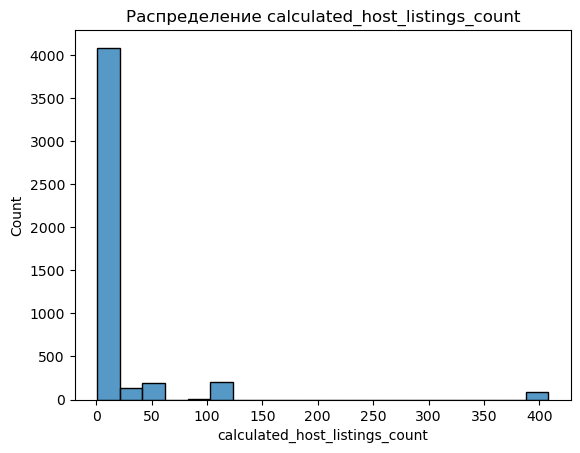

In [28]:
# Гистограмма для calculated_host_listings_count
sns.histplot(data=seattle_clean, x='calculated_host_listings_count', bins=20)
plt.title('Распределение calculated_host_listings_count')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Count')
plt.show()

Доля выбросов по этому признаку составляет примерно 14%, что говорит о том, что я в принципе могу их удалить. Однако эта переменная показывает расчитанное количество объявлений хозяина. В ходе обработки данных количество объявлений у людей в датасете могло поменяться, поэтому я создам новый признак 'calculated_host_listings_count_filtered', который будет показывать расчитанное количество объявлений хозяина в обработанном датасете. Также удалю старую колонку.

In [29]:
# Группирую по столбцу host_id и считаю количество объявлений для каждого человека
# Затем преобразовываю результат в датафрейм через reset_index()
calculated_host_listings_count_filtered = seattle_clean['host_id'].value_counts().reset_index()

# Переименовываю названия столбцов
calculated_host_listings_count_filtered.columns = ['host_id', 'calculated_host_listings_count_filtered']

In [30]:
# Через метод merge() объединяю датасеты seattle_clean и calculated_host_listings_count_filtered по колонке host_id
seattle_clean = seattle_clean.merge(calculated_host_listings_count_filtered, on='host_id', how='left')

In [31]:
# Удалю столбец 'calculated_host_listings_count' из датасета 'seattle_clean'
seattle_clean = seattle_clean.drop('calculated_host_listings_count', axis=1)

**Визуализация графиков до и после обработки выбросов**

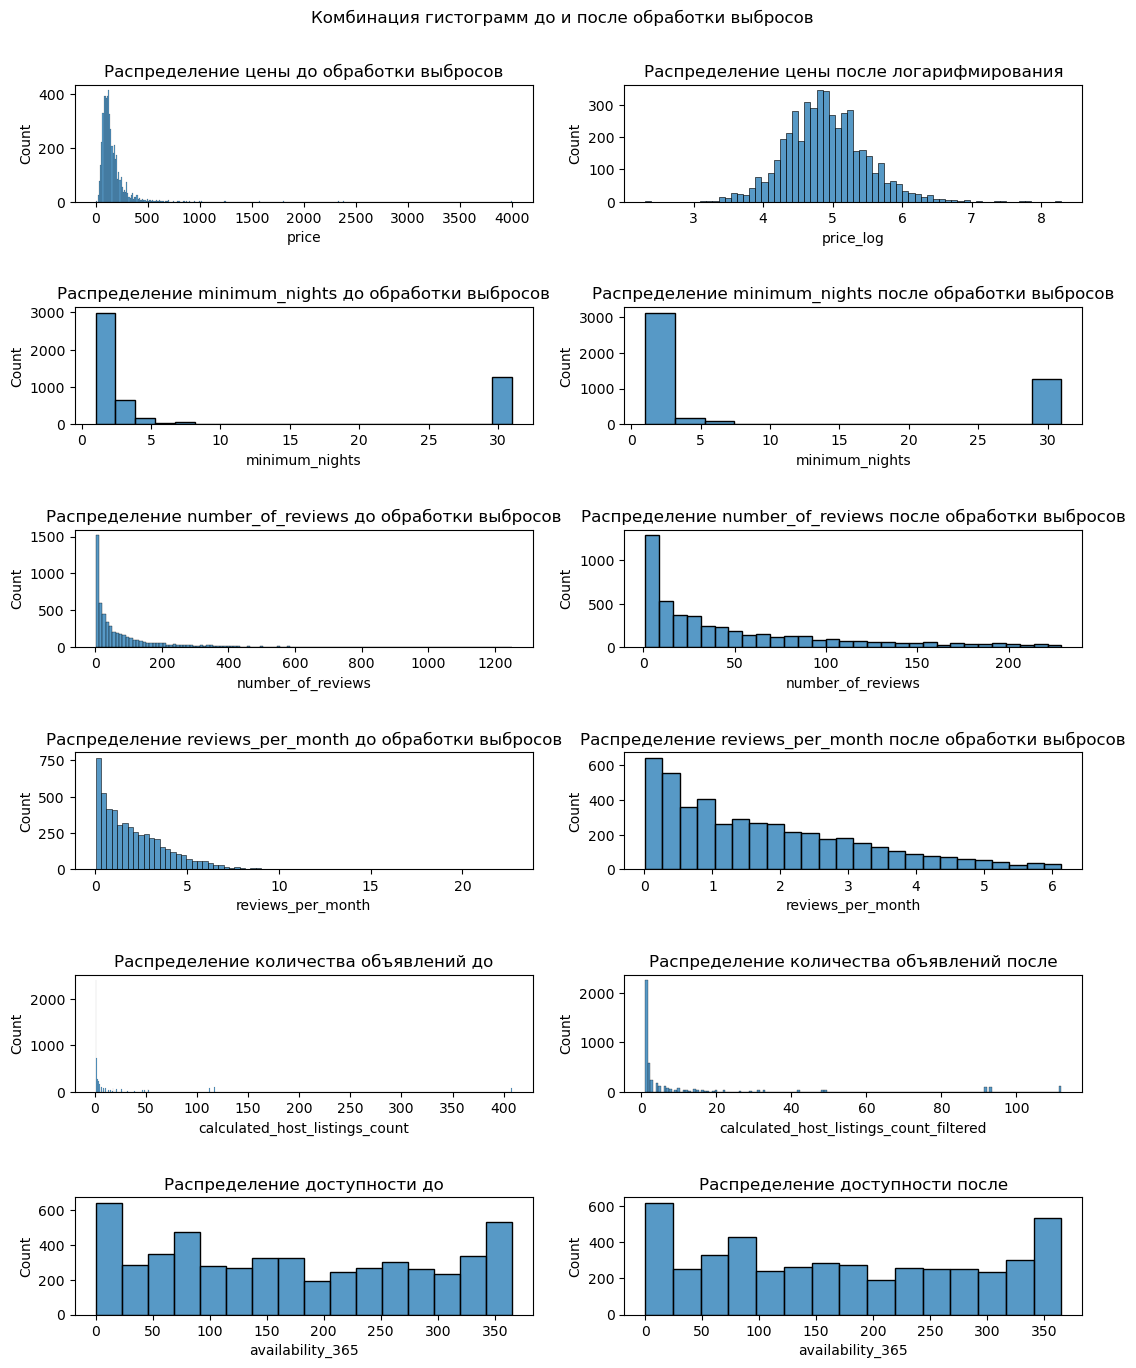

In [32]:
# Создаю объекты фигуры и массив подуровней axs с 6 рядами и 2 столбцами подуровней
fig, axs = plt.subplots(
    nrows=6,
    ncols=2,
    figsize=(13, 15),
    sharey=False, 
    sharex=False, 
    gridspec_kw={'hspace':0.9}
)

# График для 'price'
sns.histplot(seattle['price'], ax=axs[0, 0])
axs[0, 0].set_title('Распределение цены до обработки выбросов')

# График для 'price_log'
sns.histplot(seattle_clean['price_log'], ax=axs[0, 1])
axs[0, 1].set_title('Распределение цены после логарифмирования')

# График для 'minimum_nights'
sns.histplot(seattle['minimum_nights'], ax=axs[1, 0])
axs[1, 0].set_title('Распределение minimum_nights до обработки выбросов')

# График для 'minimum_nights' f
sns.histplot(seattle_clean['minimum_nights'], ax=axs[1, 1])
axs[1, 1].set_title('Распределение minimum_nights после обработки выбросов')

# График для 'number_of_reviews'
sns.histplot(seattle['number_of_reviews'], ax=axs[2, 0])
axs[2, 0].set_title('Распределение number_of_reviews до обработки выбросов')

# График для 'number_of_reviews'f
sns.histplot(seattle_clean['number_of_reviews'], ax=axs[2, 1])
axs[2, 1].set_title('Распределение number_of_reviews после обработки выбросов')

# График для 'reviews_per_month'
sns.histplot(seattle['reviews_per_month'], ax=axs[3, 0])
axs[3, 0].set_title('Распределение reviews_per_month до обработки выбросов')

# График для 'reviews_per_month' f
sns.histplot(seattle_clean['reviews_per_month'], ax=axs[3, 1])
axs[3, 1].set_title('Распределение reviews_per_month после обработки выбросов')

# График для 'calculated_host_listings_count'
sns.histplot(seattle['calculated_host_listings_count'], ax=axs[4, 0])
axs[4, 0].set_title('Распределение количества объявлений до')

# График для 'calculated_host_listings_count' f
sns.histplot(seattle_clean['calculated_host_listings_count_filtered'], ax=axs[4, 1])
axs[4, 1].set_title('Распределение количества объявлений после')

# График для 'availability_365'
sns.histplot(seattle['availability_365'], ax=axs[5, 0])
axs[5, 0].set_title('Распределение доступности до')

# График для 'availability_365'
sns.histplot(seattle_clean['availability_365'], ax=axs[5, 1])
axs[5, 1].set_title('Распределение доступности после')

# Задаю заголовок всему графику
fig.suptitle('Комбинация гистограмм до и после обработки выбросов')
plt.subplots_adjust(top=0.93)

# Отображаю график
plt.show()

**Критерии оценки:**

* Визуализация распределений числовых столбцов для выявления выбросов.
* Принятие обоснованного решения о том, как обработать выбросы и успешное выполнение соответствующих операций.
* Предоставление графиков до и после обработки выбросов для демонстрации успешной обработки.

### Создание новых признаков

* Создам признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города. В качестве координат центра использую значения с сайта: https://batchgeo.com/map/latitude-longitude

* Создам новый признак "days_since_last_review" на основе столбца 'last_review'. Это может быть полезно для определения свежести отзывов и активности размещения.

* Создам новый признак "booking_rate" на основе столбцов 'availability_365' и 'number_of_reviews'. Это может быть полезно для определения популярности размещения.

* Проведу анализ созданных признаков: исследую распределения

В Python есть функция для вычисления расстояния между двумя точками на Земле по их координатам широты и долготы. Она находится в модуле geopy, который можно установить с помощью pip командой pip install geopy. После установки модуля можно импортировать из него класс distance и использовать его метод distance() для вычисления расстояния между двумя точками.

**Создание нового признака 'distance_to_city_center_km'**

In [33]:
# Устанавливаю модуль geopy
!pip install geopy

In [34]:
from geopy.distance import distance

# Координаты центра города
city_lat, city_lon = 50, -120

# Функция для вычисления расстояния от дома до центра города
def distance_to_city(data):
    object_lat, object_lon = data['latitude'], data['longitude']
    dist = distance((object_lat, object_lon), (city_lat, city_lon)).km
    return dist

# Создаю новый столбец с расстоянием до центра города
# Использую axis = 1, чтобы применить функцию distance_to_city к каждой строке датасета, а не к столбцу
seattle_clean['distance_to_city_center_km'] = seattle_clean.apply(distance_to_city, axis=1)

**Создание нового признака 'days_since_last_review'**

In [35]:
from datetime import date

# Сегодняшняя дата
today = pd.to_datetime(date.today())

# Вычисляю разницу между датами в днях и сохраняю в новый столбец
seattle_clean['days_since_last_review'] = (today - seattle_clean['last_review']).dt.days

**Создание нового признака 'booking_rate'** на основе столбцов 'availability_365' и 'number_of_reviews'.

Для определения рейтинга объекта буду делить количество отзывов на количество доступных дней и умножу на 100, чтобы получить значение в процентах.
Так как в датасете есть наблюдения, когда 'availability_365' равен 0, то есть в ближайшие 365 дней невозможно забронировать объект, я заменю эти значения на 1, чтобы не получить бесконечность в данных. На результат это никак не повлияет. Если количество отзывов больше 0, то рейтинг получится равным 100%.

In [36]:
seattle_clean['availability_365'] = seattle_clean['availability_365'].replace(0, 1)

In [37]:
seattle_clean['booking_rate'] = (seattle_clean['number_of_reviews'] / seattle_clean['availability_365']) * 100

# Так как в некоторых наблюдениях получается рейтинг больше 100%, заменю их на макс 100%
seattle_clean['booking_rate'] = seattle_clean['booking_rate'].apply(lambda x: min(x, 100))

**Анализ распределения нового признака distance_to_city_center_km**

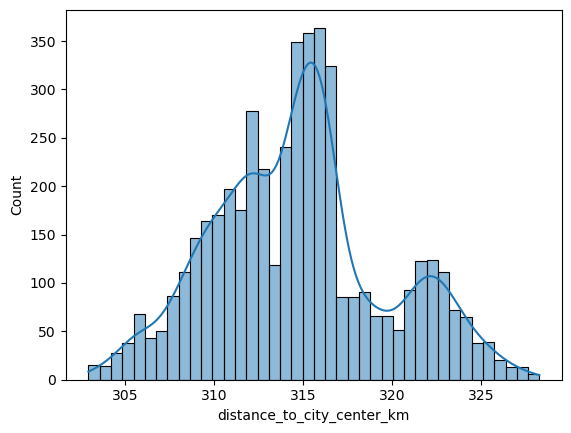

In [38]:
# Гистограмма распределения расстояний объектов до центра города
sns.histplot(seattle_clean['distance_to_city_center_km'], kde = True);

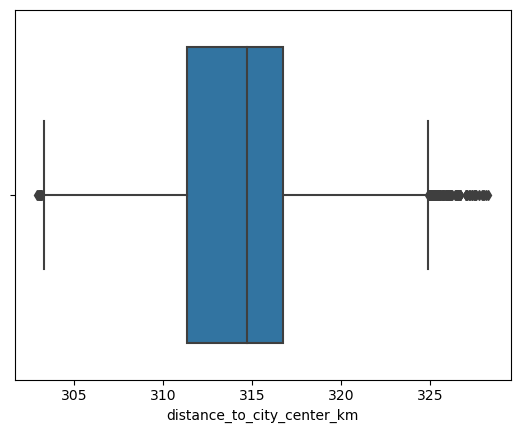

In [39]:
# Ящик с усами для рейтинга бронирования
sns.boxplot(data=seattle_clean, x='distance_to_city_center_km');

In [40]:
# Описательная статистика
print(seattle_clean['distance_to_city_center_km'].describe())

count    4715.000000
mean      314.710833
std         4.835866
min       302.918503
25%       311.319885
50%       314.698299
75%       316.744946
max       328.260612
Name: distance_to_city_center_km, dtype: float64


In [41]:
from scipy.stats import skew
print('Асимметрия: ', skew(seattle_clean['distance_to_city_center_km']))

Асимметрия:  0.27266670551109595


Расстояния объектов до центра города распределены пример от 302 км до 328 км. Выбросы присутствуют.
Средняя и медиана по столбцу 'distance_to_city_center_km' примерно равны. Также по гистограмме можно сказать, что распределение немного близко к нормальному. Кроме этого, значение асимметрии (~0.27) указывает на небольшую правостороннюю асимметрию.

Больше всего объекты находятся на расстоянии ~315 км от центра города, это можно заметить по самому высокому столбцу на гистограмме.

**Анализ распределения нового признака days_since_last_review**

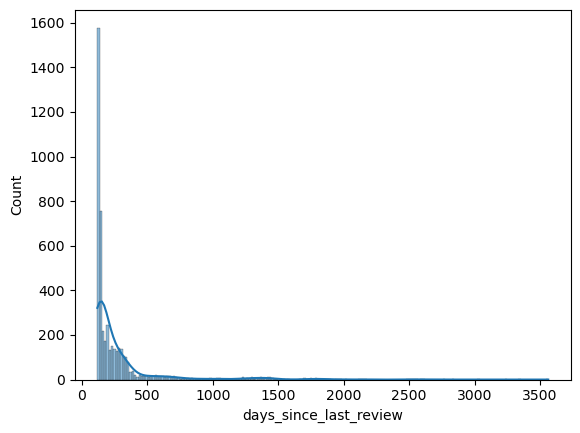

In [42]:
# Гистограмма распределения прошедших дней после последнего отзыва
sns.histplot(seattle_clean['days_since_last_review'], kde = True);

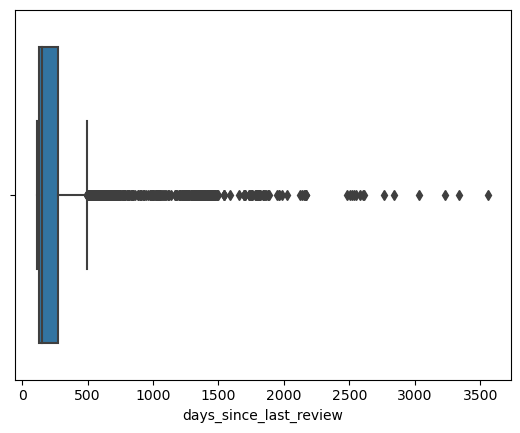

In [43]:
# Ящик с усами для количества дней с последнего отзыва
sns.boxplot(data=seattle_clean, x='days_since_last_review');

In [44]:
print('Описательная статистика\n', seattle_clean['days_since_last_review'].describe())

Описательная статистика
 count    4715.000000
mean      272.530859
std       315.350894
min       117.000000
25%       129.000000
50%       155.000000
75%       276.000000
max      3562.000000
Name: days_since_last_review, dtype: float64


In [45]:
from scipy.stats import skew
print('Асимметрия:', skew(seattle_clean['days_since_last_review']))

Асимметрия: 4.115982396272994


In [46]:
print('Мода:', seattle_clean['days_since_last_review'].mode())

Мода: 0    122
Name: days_since_last_review, dtype: int64


Количество прошедших дней с последних отзывов объявлений распределено ненормально. Кроме этого, есть достаточно много выбросов, не попавших в ящик с усами. Средняя намного больше, чем медиана. Значение асимметрии равное 4 указывает на значительную положительную асимметрию в распределении данных. Распределение имеет длинный правый хвост. Чаще всего по признаку 'days_since_last_review' встречается значение 48, значит больше всего последний раз отзыв оставляли 48 дней назад.

**Анализ распределения нового признака booking_rate**

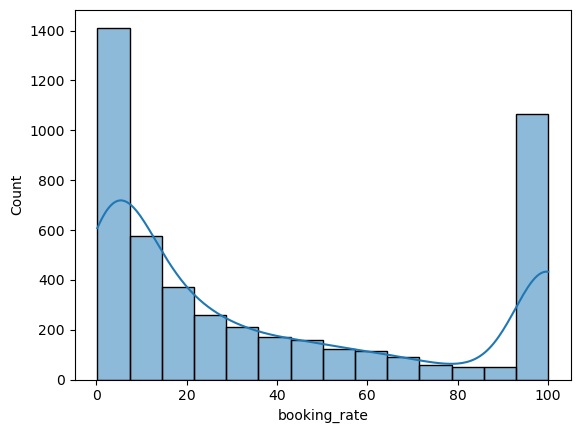

In [47]:
# Гистограмма распределения рейтинга бронирования
sns.histplot(seattle_clean['booking_rate'], kde = True);

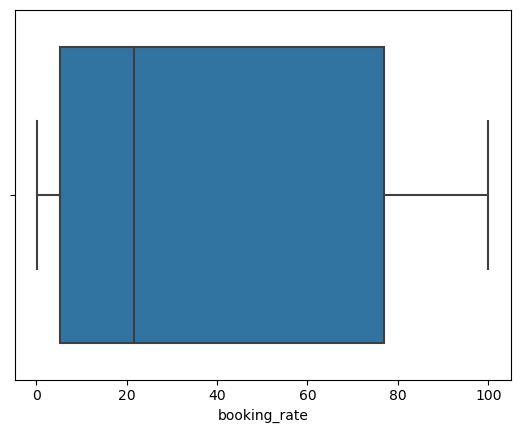

In [48]:
# Ящик с усами для рейтинга бронирования
sns.boxplot(data=seattle_clean, x='booking_rate');

In [49]:
print('Описательная статистика\n', seattle_clean['booking_rate'].describe())

Описательная статистика
 count    4715.000000
mean       38.854935
std        38.483322
min         0.273973
25%         5.206906
50%        21.556886
75%        76.937375
max       100.000000
Name: booking_rate, dtype: float64


In [50]:
from scipy.stats import skew
print('Асимметрия:', skew(seattle_clean['booking_rate']))

Асимметрия: 0.6495986063556929


Распределение по рейтингу бронирования немного близко к бимодальному. Выбросов нет (наверно, из-за того, что рейтинг только от 0 до 100%). Средняя больше, чем медиана, что указывает на положительную асимметрию в распределении данных, как и положительное значение асимметрии. По гистограмме можно сказать, что чаще всего у объектов рейтинг примерно 0-7% и 93-100%.

**Вывод о структуре и типах данных после создания новых признаков**

In [51]:
seattle_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4714
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   id                                       4715 non-null   int64         
 1   name                                     4715 non-null   object        
 2   host_id                                  4715 non-null   int64         
 3   host_name                                4715 non-null   object        
 4   neighbourhood_group                      4715 non-null   object        
 5   neighbourhood                            4715 non-null   object        
 6   latitude                                 4715 non-null   float64       
 7   longitude                                4715 non-null   float64       
 8   room_type                                4715 non-null   object        
 9   price                                    

### Время статистики!

* Рассчитаю описательные статистики для категориальных переменных. Опишу, какие выводы вы можете сделать из полученных данных.

* Рассчитаю описательные статистики для числовых переменных. Опишу, какие выводы вы можете сделать из полученных данных для хотя бы трех признаков.

* Выберу 3 интересующих числовых признака и рассчитаю релевантные описательные статистики для этих признаков, сгруппировав данные по категориальным переменным, таким как 'room_type', 'neighbourhood_group' или 'property_type'.

**Описательные статистики для категориальных переменных**

In [52]:
seattle_clean.select_dtypes(include='object').describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,license
count,4715,4715,4715,4715,4715,4715
unique,4637,1553,17,88,4,2947
top,"Capitol Hill Studio w/ Rooftop, Pet Area, nr bars",Melissa,Other neighborhoods,Broadway,Entire home/apt,No license
freq,10,128,1002,244,3989,738


По всем категориальным переменным нет пропущенных значений.

Также можно сказать, что из 4715 наблюдений чаще всего в объявлениях по группе района написано 'Other neighborhoods' (1002 раза встречается), то есть другие группы районов из указанных в датасете. 

Самый популярный район - Broadway. Встретилось 244 раза в данных.

Кроме этого, больше всего в Сиетле на платформе Airbnb выкладывают объявления объектов типа Entire home/apt (3989 раз встретилось из 4715). То есть чаще сдают весь дом/квартиру. Всего 4 типа комнаты в датасете.

Более того, у 738 объектов нет лицензии или она не требуется.

**Описательные статистики для числовых переменных**

In [53]:
seattle_clean.select_dtypes(include=['int64', 'float64']).describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,price_log,calculated_host_listings_count_filtered,distance_to_city_center_km,days_since_last_review,booking_rate
count,4.715000e+03,4.715000e+03,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,2.106515e+17,1.283106e+08,47.626568,-122.334040,161.182609,9.791092,48.237752,1.751767,174.113892,16.435207,-inf,11.516649,314.710833,272.530859,38.854935
std,3.180953e+17,1.486210e+08,0.051477,0.034314,144.822478,12.450183,53.755691,1.453618,118.479613,17.849254,NaN,24.846758,4.835866,315.350894,38.483322
min,6.606000e+03,2.536000e+03,47.497920,-122.419050,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,-inf,1.000000,302.918503,117.000000,0.273973
25%,2.558462e+07,1.439166e+07,47.595926,-122.358330,90.000000,2.000000,7.000000,0.510000,71.000000,2.000000,4.499810,1.000000,311.319885,129.000000,5.206906
50%,4.893670e+07,6.055725e+07,47.625020,-122.332310,130.000000,2.000000,27.000000,1.410000,166.000000,9.000000,4.867534,2.000000,314.698299,155.000000,21.556886
75%,5.987511e+17,1.924052e+08,47.665805,-122.309095,190.000000,30.000000,72.000000,2.660000,279.000000,26.000000,5.247024,7.000000,316.744946,276.000000,76.937375
max,8.467570e+17,5.034165e+08,47.734010,-122.240870,4000.000000,31.000000,229.000000,6.140000,365.000000,120.000000,8.294050,112.000000,328.260612,3562.000000,100.000000


In [54]:
seattle_clean['number_of_reviews'].describe()

count    4715.000000
mean       48.237752
std        53.755691
min         1.000000
25%         7.000000
50%        27.000000
75%        72.000000
max       229.000000
Name: number_of_reviews, dtype: float64

Описание 3 признаков:

1. **'minimum_nights'**

* Количество наблюдений (count) составляет 4715, что означает, что у нас есть информация о минимальном количестве ночей для всех 4715 различных объектов.
* Среднее значение (mean) равно 9.791092, значит в среднем нужно бронировать минимум на 9-10 ночей.
* Стандартное отклонение (std) равно 12.450183, это указывает на значительную вариабельность в требуемом минимальном количестве ночей, что может быть связано с разными типами объектов и их особенностями.
* Минимальное значение (min) равно 1, что означает, что некоторые объекты могут требовать бронирования всего на одну ночь.
* 25-й перцентиль (25%) равен 2, а медиана (50%) также равна 2, что указывает на то, что большинство объектов имеют минимальное количество ночей, равное 2.
* 75-й перцентиль (75%) равен 30, что говорит о том, что в некоторых случаях требуется бронирование на более длительный срок, до 30 ночей.
* Максимальное значение (max) равно 31, что означает, что самое большое минимальное количество ночей для бронирования составляет 31.

2. **'distance_to_city_center_km'**
* Количество наблюдений (count) составляет 4715, что означает, что у нас есть информация о расстоянии до центра города для всех 4715 различных объектов.
* Среднее значение (mean) равно 314.710833, значит в среднем объекты находятся в 314.7 км от центра Сиетла.
* Стандартное отклонение (std) равно 4.835866. Маленькое значение стандартного отклонения указывает на то, что большинство объектов находятся близко к центру города с небольшой вариабельностью в расстояниях.
* Минимальное значение (min) равно 302.918503, что означает, что самый близкий к центру объект находится на расстоянии 302.9 км от центра города.
* 25-й перцентиль (25%) равен 311.319885, а 75-й перцентиль (75%) равен 316.744946, что указывает на некоторую небольшую вариабельность в расстоянии объектов до центра города. 
* Медиана (50%) равна 314.698299. Это говорит о том, что большинство объектов находятся вблизи среднего расстояния от центра города.
* Максимальное значение (max) равно 328.260612, что означает, что самое большое расстояние от объектов до центра города составляет 328.260612 км.

3. **'number_of_reviews'**
* Количество наблюдений (count) составляет 4715, что означает, что у нас есть информация о количестве отзывов для всех 4715 различных объектов.
* Среднее значение (mean) равно 48.237752, значит в среднем у объектов примерно 48 отзывов на платформе Airbnb.
* Стандартное отклонение (std) равно 53.755691, что говорит о разбросе значений вокруг среднего. Большое значение стандартного отклонения указывает на значительную вариабельность в количестве отзывов между объектами.
* Минимальное значение (min) равно 1, что означает, что у некоторых объектов есть всего один отзыв.
* 25-й перцентиль (25%) равен 7, а медиана (50%) равна 27. Это говорит о том, что большинство объектов имеют небольшое количество отзывов.
* 75-й перцентиль (75%) равен 72, что указывает на наличие объектов с достаточно большим количеством отзывов.
* Максимальное значение (max) равно 229, что означает, что некоторые объекты имеют очень высокое количество отзывов.

**Описательные статистики для логарифмированной цены ('price_log'), сгруппированные по переменной 'neighbourhood_group'**

In [55]:
seattle_clean.groupby('neighbourhood_group')['price_log'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

,mean,median,std,min,max,count
neighbourhood_group,,,,,,
Ballard,4.934512,4.901557,0.479453,3.806662,6.309918,270
Beacon Hill,4.804678,4.779123,0.547062,3.465736,6.308098,232
Capitol Hill,4.999537,4.941642,0.524005,3.555348,6.747587,387
Cascade,4.978172,4.955827,0.509394,3.555348,6.244167,135
Central Area,4.945094,4.945201,0.609072,3.555348,7.130899,428
Delridge,4.636636,4.615121,0.599111,3.496508,6.684612,159
Downtown,NaN,5.030438,NaN,-inf,6.928538,486
Interbay,4.562674,4.304065,0.554286,3.970292,6.206576,37
Lake City,4.738282,4.744932,0.546913,3.610918,6.620073,93


Представленные описательные статистики для признака 'price_log', сгруппированные по категориальной переменной "neighbourhood_group", позволяют сделать следующие наблюдения:

* Средние значения логарифмированной цены (mean) варьируются от района к району. Например, Queen Anne имеет наивысшее среднее значение, а Delridge - наименьшее.
* Медианные значения логарифмированной цены (median) также различаются в разных районах. Например, Queen Anne и Interbay. Также можно заметить, что Central Area и Cascade имеют близкие медианные значения, но Central Area имеет большее стандартное отклонение, что указывает на больший разброс цен в этом районе.
* Стандартное отклонение (std) показывает, что в некоторых районах разброс цен велик (например, Central Area), а в других - относительно небольшой (например, Seward Park).
* Минимальные и максимальные значения логарифмированной цены (min и max) показывают различия в диапазонах логарифмированных цен в разных районах.

**Описательные статистики для минимального количества ночей для брони('minimum_nights'), сгруппированные по переменной 'room_type'**

In [56]:
seattle_clean.groupby('room_type')['minimum_nights'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

,mean,median,std,min,max,count
room_type,,,,,,
Entire home/apt,9.743043,2.0,12.367448,1.0,31.0,3989
Hotel room,1.000000,1.0,NaN,1.0,1.0,1
Private room,9.885635,2.0,12.820997,1.0,31.0,717
Shared room,26.375000,30.0,10.253048,1.0,30.0,8


Исходя из этих статистических показателей, можно сделать вывод, что требования к минимальному количеству ночей для бронирования варьируются в зависимости от типа помещения. Объекты типа "Entire home/apt" и "Private room" обычно предлагают более гибкие варианты по продолжительности пребывания, в то время как объекты типа "Shared room" имеют более строгие требования к минимальному количеству ночей. По типу "Hotel room" есть только 1 наблюдение, поэтому невозможно сделать анализ.

**Описательные статистики для рейтинга бронирования ('booking_rate'), сгруппированные по переменной 'neighbourhood_group'**

In [57]:
seattle_clean.groupby('neighbourhood_group')['booking_rate'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

,mean,median,std,min,max,count
neighbourhood_group,,,,,,
Ballard,41.917144,26.402676,38.653845,0.273973,100.0,270
Beacon Hill,43.535224,25.249629,40.846568,0.274725,100.0,232
Capitol Hill,43.179022,32.017544,39.815034,0.273973,100.0,387
Cascade,22.805555,4.255319,35.568683,0.273973,100.0,135
Central Area,42.923583,29.356061,38.984126,0.273973,100.0,428
Delridge,42.581095,27.067669,40.577266,0.281690,100.0,159
Downtown,36.686629,19.181123,37.700824,0.273973,100.0,486
Interbay,18.515876,2.431611,34.363433,0.591716,100.0,37
Lake City,34.085037,20.817844,34.710518,0.273973,100.0,93


Исходя из этих статистических показателей, можно сделать вывод:

* Средние значения рейтинга бронирования (mean) варьируются от района к району. Например, Seward Park имеет самое высокое среднее значение рейтинга бронирования, а Interbay - наименьшее.
* Медианные значения рейтинга бронирования (median) также различаются в разных районах. Например, Seward Park имеет наивысшее медианное значение, а Interbay - наименьшее. Это может указывать на различия в средней популярности или оценке объектов проживания в этих районах.
* Стандартное отклонение (std) показывает, что в некоторых районах разброс рейтинга бронирования велик (например, Cascade), а в других - относительно небольшой (например, Interbay). Большое стандартное отклонение может указывать на более разнообразные или неоднородные оценки объектов проживания в районе.
* Минимальные и максимальные значения рейтинга бронирования (min и max) показывают различия в диапазоне рейтингов в разных районах. Например, все районы имеют минимальное значение рейтинга не ниже 0.273973, а максимальное значение составляет 100.0. Это указывает на наличие как хорошо оцененных объектов проживания, так и объектов с низким рейтингом во всех районах.

### Корреляции

* Найду три самых сильных линейных взаимосвязи.

* Опишу, между какими признаками я их нашла и содержательно проинтерпретирую, почему эти показатели связаны.

In [58]:
correlation_matrix = seattle_clean.corr().abs()
print('Матрица корреляций\n', correlation_matrix)

Матрица корреляций
                                                id   host_id  latitude  \
id                                       1.000000  0.332455  0.007179   
host_id                                  0.332455  1.000000  0.045010   
latitude                                 0.007179  0.045010  1.000000   
longitude                                0.009473  0.030046  0.154098   
price                                    0.041328  0.015434  0.030091   
minimum_nights                           0.230972  0.174382  0.068825   
number_of_reviews                        0.430515  0.211214  0.038615   
reviews_per_month                        0.152461  0.150599  0.086257   
availability_365                         0.082998  0.068847  0.005305   
number_of_reviews_ltm                    0.127939  0.062180  0.086223   
price_log                                0.038100  0.006249  0.003566   
calculated_host_listings_count_filtered  0.017359  0.082304  0.056635   
distance_to_city_center_km     

In [59]:
# Отбор и вывод трех пар самых сильно скоррелированных признаков
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
strongest_correlations = correlation_pairs[correlation_pairs < 1.0].drop_duplicates()[:3]
print(strongest_correlations)

distance_to_city_center_km  latitude                 0.960354
reviews_per_month           number_of_reviews_ltm    0.811828
price_log                   price                    0.779780
dtype: float64


На основе полученных самых сильных корреляций можно сделать такие выводы:

1. Корреляция между 'distance_to_city_center_km' (расстоянием до центра города в километрах) и 'latitude' (широтой) равна 0.960354. Это указывает на очень сильную положительную линейную связь между этими двумя переменными. Содержательно это может быть объяснено тем, что широта местоположения объекта проживания имеет прямое влияние на его расстояние от географического центра города. Чем больше значение широты, тем дальше объект проживания находится от центра города.
2. Корреляция между 'reviews_per_month' (средним количеством отзывов в месяц) и 'number_of_reviews_ltm' (количеством отзывов за последние 12 месяцев) составляет 0.811828. Это указывает на сильную положительную линейную связь между этими двумя переменными. Вероятно, если у объекта размещения много отзывов в среднем за месяц, то это может указывать на то, что в целом он получает больше отзывов за последние 12 месяцев.
3. Корреляция между "price_log" и "price" равна 0.779780. Эти два показателя имеют высокую положительную корреляцию, так как "price_log" представляет собой логарифмированное значение цены, а "price" - исходное значение цены.

### Визуализации

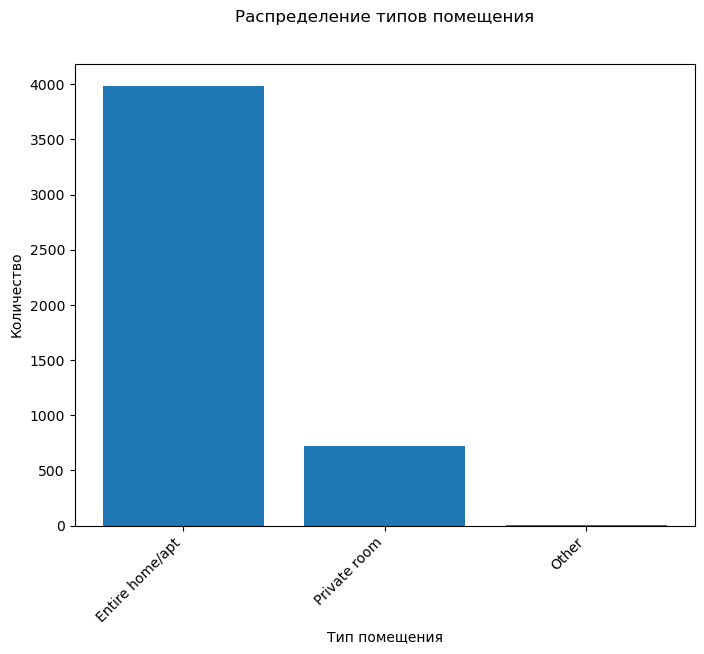

In [68]:
room_type_counts = seattle_clean['room_type'].value_counts()

# Создание новой категории "Other" и объединение "Shared room" и "Hotel room"
room_type_counts['Other'] = room_type_counts['Shared room'] + room_type_counts['Hotel room']
room_type_counts = room_type_counts.drop(['Shared room', 'Hotel room'])

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
plt.bar(room_type_counts.index, room_type_counts)
plt.title('Распределение типов помещения', pad=30)
plt.xlabel('Тип помещения')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.show()

**Интерпретация:**

Как видно по диаграмме больше всего в данных объектов типа Entire home/apt (84.6%). Далее 15.2% занимают отдельные комнаты. Оставшиеся всего 0.2% - это Shared room и Hotel room.

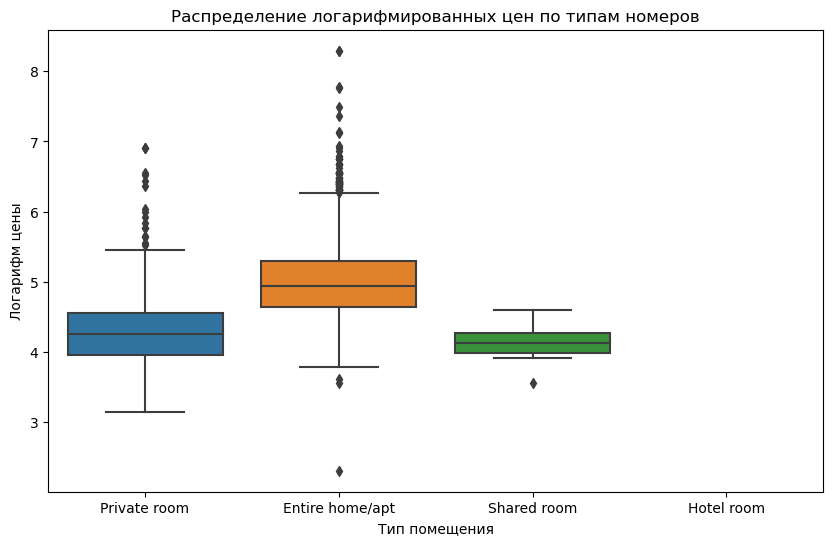

In [61]:
# Boxplot для переменной "room_type" и "price_log":
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price_log', data=seattle_clean)
plt.title('Распределение логарифмированных цен по типам номеров')
plt.xlabel('Тип помещения')
plt.ylabel('Логарифм цены')
plt.show()

**Интерпретация:**

Визуализация показывает распределение логарифма цены по типам помещений. Мы видим, что цены на аренду целых квартир и домов в среднем выше, чем цены на аренду отдельных комнат или общих комнат.

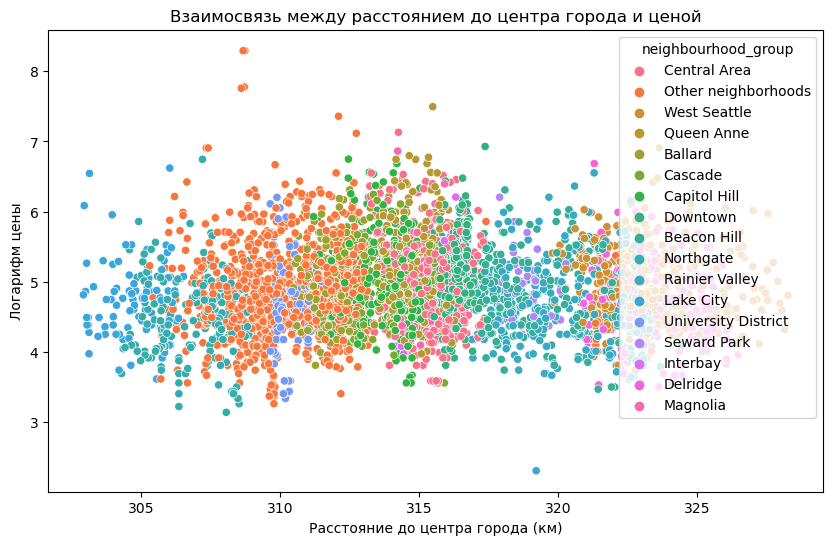

In [62]:
# Scatter plot для переменных "distance_to_city_center_km" и "price_log":
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_city_center_km', y='price_log', hue='neighbourhood_group', data=seattle_clean)
plt.title('Взаимосвязь между расстоянием до центра города и ценой')
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Логарифм цены')
plt.show()

**Интерпретация:**

Визуализация демонстрирует связь между расстоянием до центра города и логарифмом цены. По графику не наблюдается линейной связи, что означает, что расстояние до центра города не является фактором влияния на логарифм цены 1 ночи аренды объектов.

Кроме этого, для разных групп районов я сделала разные цвета. Можно заметить, что объекты из одного района находятся примерно на одинаковом расстоянии от центра города, что вполне логично. Однако есть некоторые исключения (например, для района Lake City)

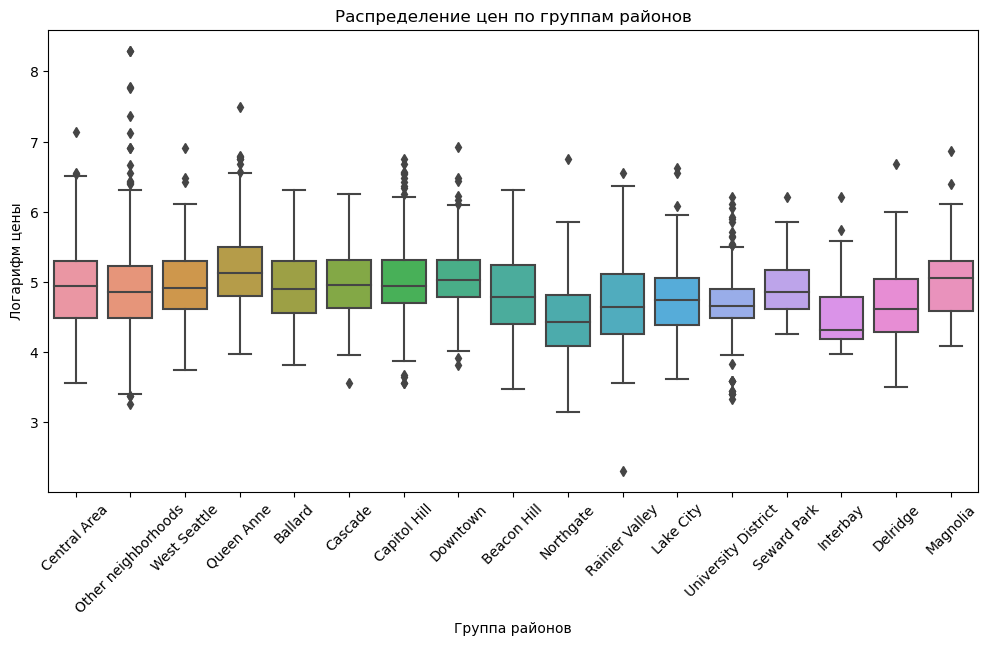

In [63]:
# Boxplot для переменной "neighbourhood_group" и "price_log":
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price_log', data=seattle_clean)
plt.title('Распределение цен по группам районов')
plt.xlabel('Группа районов')
plt.ylabel('Логарифм цены')
plt.xticks(rotation=45)
plt.show()

**Интерпретация:**

Данный boxplot показывает распределение логарифма цен на жилье в разных районах города Сиэтл. Мы можем заметить, что некоторые районы, такие как Downtown и Queen Anne, имеют более высокие цены по сравнению с другими районами, в то время как Northgate имеет более низкие цены. Также видно, что в районе Downtown существует большой разброс цен.

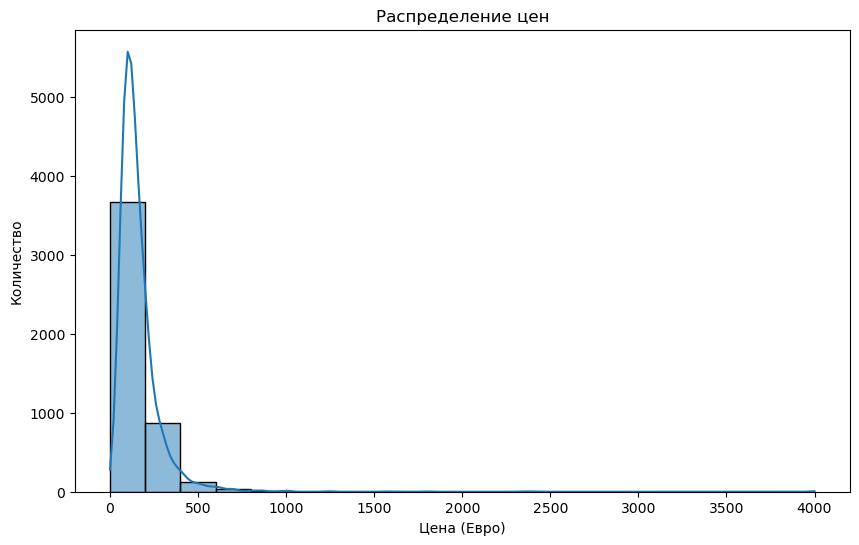

In [64]:
# Гистограмма распределения цен (переменная "price"):
plt.figure(figsize=(10, 6))
sns.histplot(seattle_clean['price'], bins=20, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена (Евро)')
plt.ylabel('Количество')
plt.show()

**Интерпретация:** 

Данная гистограмма показывает распределение цен на жилье в городе Сиэтл. Видно, что наиболее распространенные цены находятся в диапазоне от примерно 0 до 200 евро за ночь. Отмечается плавное снижение количества жилья с увеличением цены, особенно после отметки в 200 евро. Это может указывать на наличие более доступных вариантов проживания с низкими ценами, а также на редкие варианты с высокими ценами, которые могут быть представлены роскошными виллами или особыми объектами размещения. Максимальное значение достигает 4000 евро за ночь.

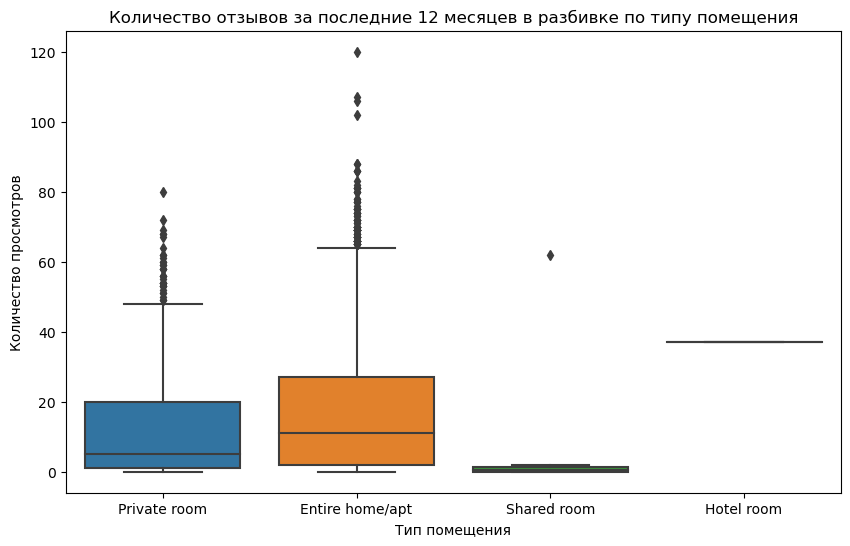

In [65]:
# График "ящик с усами" для распределения количества отзывов за последние 12 месяцев по типу комнаты:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='number_of_reviews_ltm', data=seattle_clean)
plt.title('Количество отзывов за последние 12 месяцев в разбивке по типу помещения')
plt.xlabel('Тип помещения')
plt.ylabel('Количество просмотров')
plt.show()

**Интерпретация:** 

Данный график позволяет сравнить распределение количества отзывов за последние 12 месяцев в зависимости от типа комнаты. Мы видим, что у "Жилья целиком" (Entire home/apt) и "Отдельной комнаты" (Private room) количество отзывов за последние 12 месяцев имеет значительный разброс, отмечаются как небольшие значения, так и выбросы. В то время как у "Общей комнаты" (Shared room) и "Гостиничного номера" (Hotel room) количество отзывов за последние 12 месяцев в среднем намного ниже. Это может указывать на то, что арендаторы, которые бронируют "Жилье целиком" или "Отдельную комнату", склонны оставлять больше отзывов о своем пребывании, или это может значить, что такие помещения более популярные для аренды.